## <font color=FF4455>GMM for OSA</font>


### Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

### Clustering

In [24]:
def read_data(xlsx_data):
    X = pd.read_excel(xlsx_data)
    if 'Gender' in X.columns:
        X = X.drop('Gender', axis=1)
    if 'Patient' in X.columns:
        X = X.drop('Patient', axis=1)
    return X

X = read_data('../Machine_Learning/datasets/Clinical_data.xlsx')

In [25]:
X.columns

Index(['IAH', 'Weight', 'Age', 'Height', 'Cervical', 'BMI'], dtype='object')

In [37]:
def gmm_clustering(X, n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    print(f"Silhouette Score for GMM clustering: {silhouette:.3f}")
    return labels, gmm


Silhouette Score for GMM clustering: 0.260
Silhouette Score for GMM clustering: 0.141
Silhouette Score for GMM clustering: 0.077
Silhouette Score for GMM clustering: 0.117
Silhouette Score for GMM clustering: 0.072
Silhouette Score for GMM clustering: 0.056
Silhouette Score for GMM clustering: 0.055
Silhouette Score for GMM clustering: 0.043
Silhouette Score for GMM clustering: 0.055


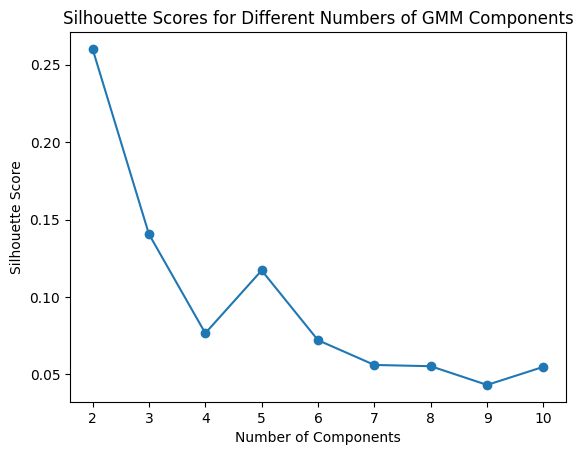

In [38]:
# Define a range for the number of components
n_components_range = range(2, 11)
silhouette_scores = []

# Loop over the range and compute silhouette scores
for n_components in n_components_range:
    _, gmm = gmm_clustering(X, n_components=n_components)
    labels = gmm.predict(X)
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)

# Plot the silhouette scores
plt.plot(n_components_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of GMM Components")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")
plt.show()

In [39]:
# Perform clustering
cluster_labels, gmm_model = gmm_clustering(X, n_components=2)

Silhouette Score for GMM clustering: 0.260


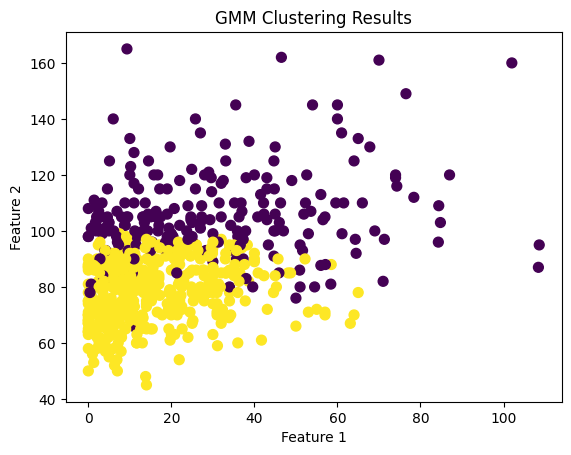

In [40]:
# Plot clusters
plt.scatter(X.values[:, 0], X.values[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("GMM Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### Classification

In [42]:
def split_data(xlsx_data):
    """
    Reads xlsx file, separates features from variables, and split it into train and test
    """
    df = pd.read_excel(xlsx_data)
    # Define feature matrix (X) and target variable (y)
    if 'Patient' in df.columns:
        df = df.drop('Patient', axis=1)
    
    # Add OSA category based on IAH values: 0: No OSA, 1: OSA
    df.loc[:, 'OSA'] = df['IAH'].apply(lambda x: 0 if x <= 10 else (1 if x >= 30 else None))

    # Remove rows with IAH values larger than 10 and less than 30
    df = df.dropna(subset=['OSA'])
    
    X = df.drop(['IAH', 'OSA'], axis=1)  # Features
    y = df['OSA']  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data('../Machine_Learning/datasets/Clinical_data.xlsx')


In [43]:
def gmm_classification(X_train, y_train, X_test, y_test):
    models = {}
    for cls in np.unique(y_train):
        gmm = GaussianMixture(n_components=2, random_state=42)
        gmm.fit(X_train[y_train == cls])
        models[cls] = gmm
        
    # Predict using Bayes' rule
    probs = np.array([model.score_samples(X_test) for model in models.values()]).T
    predictions = np.argmax(probs, axis=1)

    # Evaluate
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1-Score: {f1:.3f}")

gmm_classification(X_train, y_train, X_test, y_test)

Accuracy: 0.500, Precision: 0.468, Recall: 1.000, F1-Score: 0.638


### Data Generation

In [47]:
def split_data(xlsx_data):
    """
    Reads xlsx file, separates features from variables, and split it into train and test
    """
    df = pd.read_excel(xlsx_data)
    # Define feature matrix (X) and target variable (y)
    if 'Patient' in df.columns:
        df = df.drop('Patient', axis=1)
    X = df.drop('IAH', axis=1)  # Features
    y = df['IAH']  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data('../Machine_Learning/datasets/Clinical_data.xlsx')


In [48]:
def generate_data_with_gmm(X, n_samples=100):
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(X)
    new_data, _ = gmm.sample(n_samples)
    return new_data

# Generate new data
new_data = generate_data_with_gmm(X, n_samples=200)

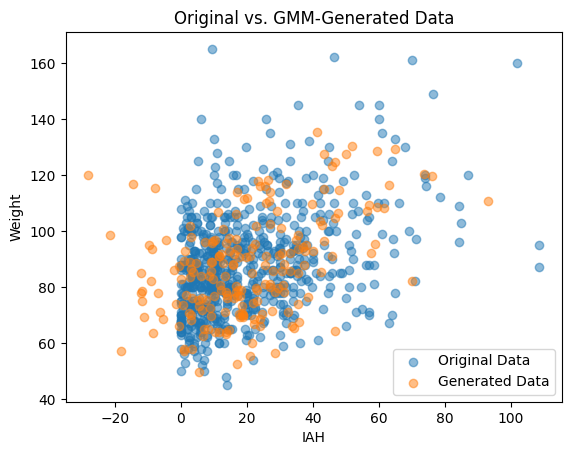

In [51]:
# Plot generated data
plt.scatter(X.values[:, 0], X.values[:, 1], label="Original Data", alpha=0.5)
plt.scatter(new_data[:, 0], new_data[:, 1], label="Generated Data", alpha=0.5)
plt.title("Original vs. GMM-Generated Data")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

Original Data Statistics:
              IAH      Weight         Age      Height    Cervical         BMI
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000
mean    20.364653   87.683230   49.428571  171.314729   40.649452   29.836178
std     18.692784   18.231255   12.392234    9.496841    3.909366    5.580064
min      0.000000   45.000000   19.000000  144.000000   30.000000   18.289895
25%      6.300000   75.000000   40.000000  165.000000   38.000000   26.038781
50%     14.200000   86.000000   49.000000  171.000000   41.000000   28.734672
75%     30.000000   97.000000   59.000000  178.000000   43.000000   32.653061
max    108.600000  165.000000   88.000000  197.000000   53.000000   63.654952

Generated Data Statistics:
              IAH      Weight         Age      Height    Cervical         BMI
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000
mean    20.386463   87.395721   49.147397  170.067577   40.116484   30.174609
std     19

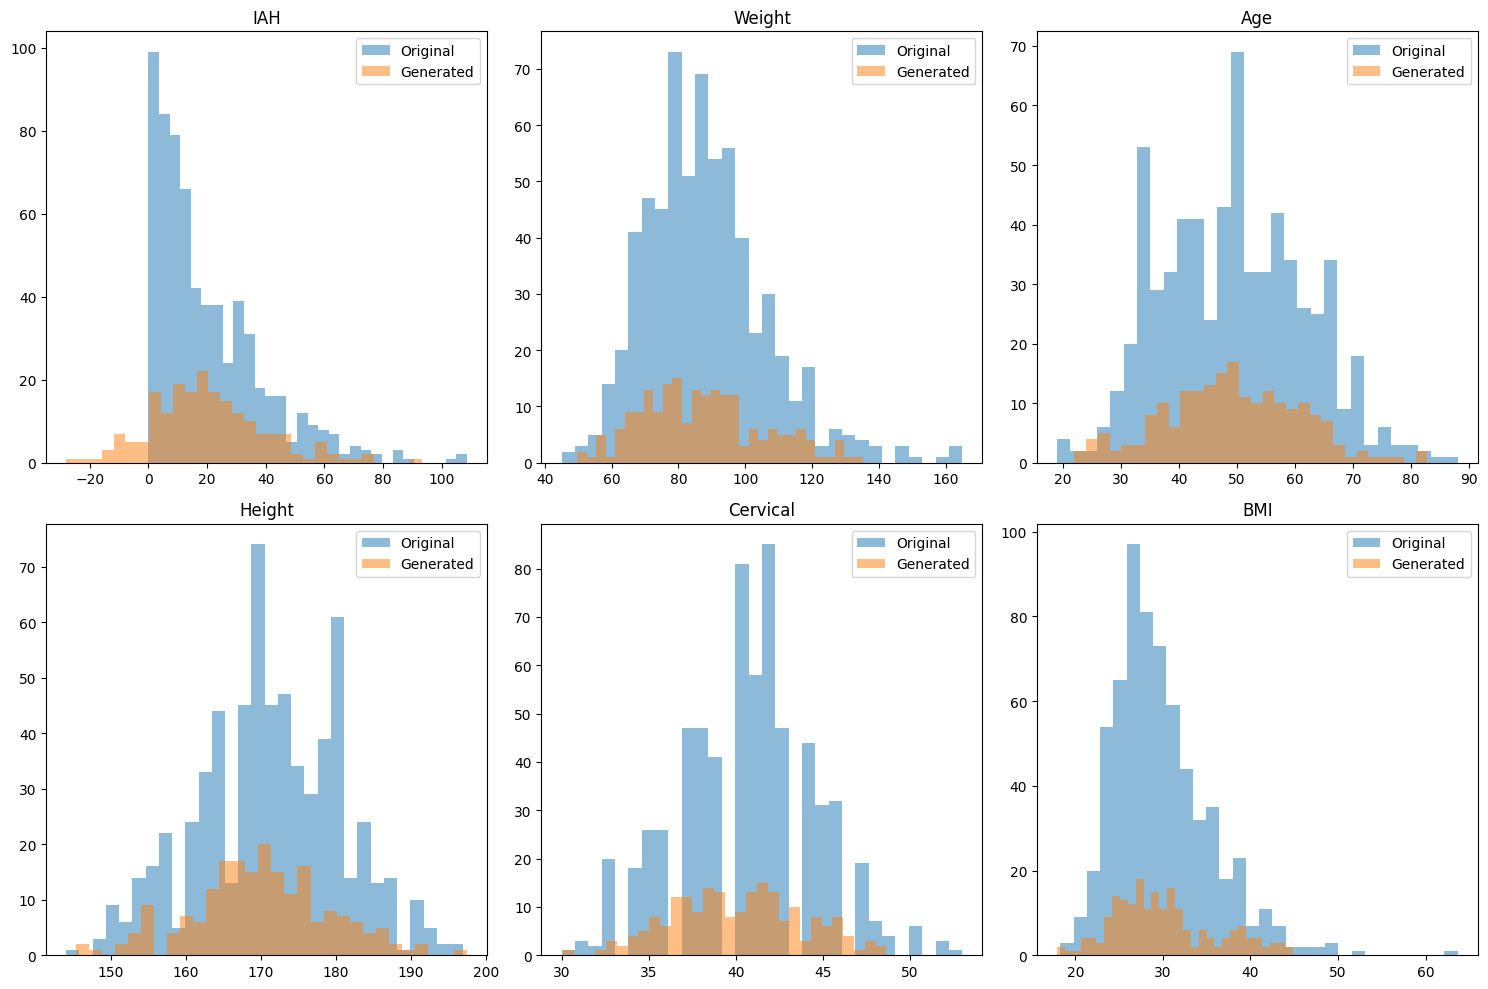

In [ ]:
# Descriptive Statistics
print("Original Data Statistics:")
print(X.describe())
print("\nGenerated Data Statistics:")
print(pd.DataFrame(new_data, columns=X.columns).describe())

# Visualization
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, column in enumerate(X.columns):
    ax = axes[i // 3, i % 3]
    ax.hist(X[column], bins=30, alpha=0.5, label='Original')
    ax.hist(new_data[:, i], bins=30, alpha=0.5, label='Generated')
    ax.set_title(column)
    ax.legend()

plt.tight_layout()
plt.show()

In [54]:
from scipy.stats import ks_2samp

def compare_distributions(original_data: pd.DataFrame, generated_data: pd.DataFrame):
    for col in original_data.columns:
        if col in generated_data.columns:
            original = original_data[col].dropna()
            generated = generated_data[col].dropna()
            statistic, p_value = ks_2samp(original, generated)
            print(f"Column: {col}")
            print(f"  KS statistic: {statistic}, p-value: {p_value}\n")


In [55]:
generated_df = pd.DataFrame(new_data, columns=X.columns)
compare_distributions(X, generated_df)

Column: IAH
  KS statistic: 0.1162095531587057, p-value: 0.029218236516478674

Column: Weight
  KS statistic: 0.0687211093990755, p-value: 0.4421522144897532

Column: Age
  KS statistic: 0.08970724191063174, p-value: 0.1588051972058653

Column: Height
  KS statistic: 0.11652542372881355, p-value: 0.02855686627003418

Column: Cervical
  KS statistic: 0.1390677966101695, p-value: 0.004780881700925192

Column: BMI
  KS statistic: 0.06292758089368258, p-value: 0.5542835213760786

